In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#read the data
df1 = pd.read_csv('E:/New folder/Air India Passenger.csv')

In [4]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#check data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#we are providing inputs to tell pandas that we are trying to wotk with time series.
df1 = pd.read_csv('E:/New folder/Air India Passenger.csv', parse_dates = ['Month'])

In [7]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('E:/New folder/Air India Passenger.csv', parse_dates = ['Month'], index_col = 'Month')

In [10]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
#We can  conveniently do slicing i.e. obtain data for a specific time period
df1['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [12]:
#We can check values corresponding to a specific time point
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

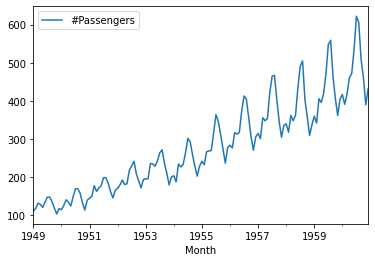

In [13]:
#Plot the time series
df1.plot()
plt.show()

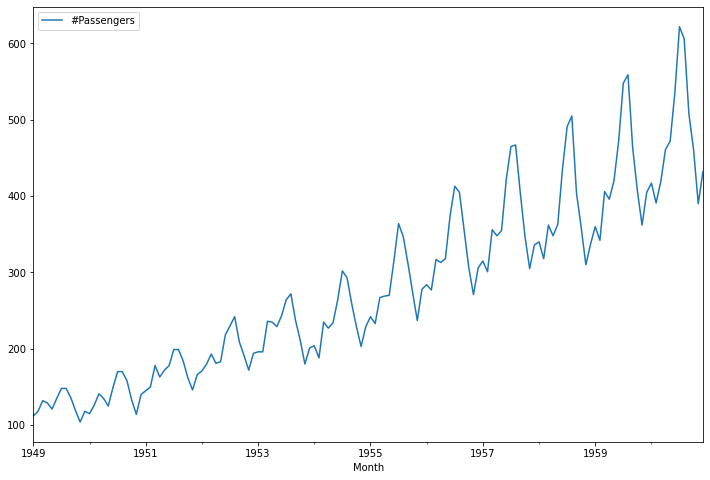

In [14]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df1.plot()
plt.show()

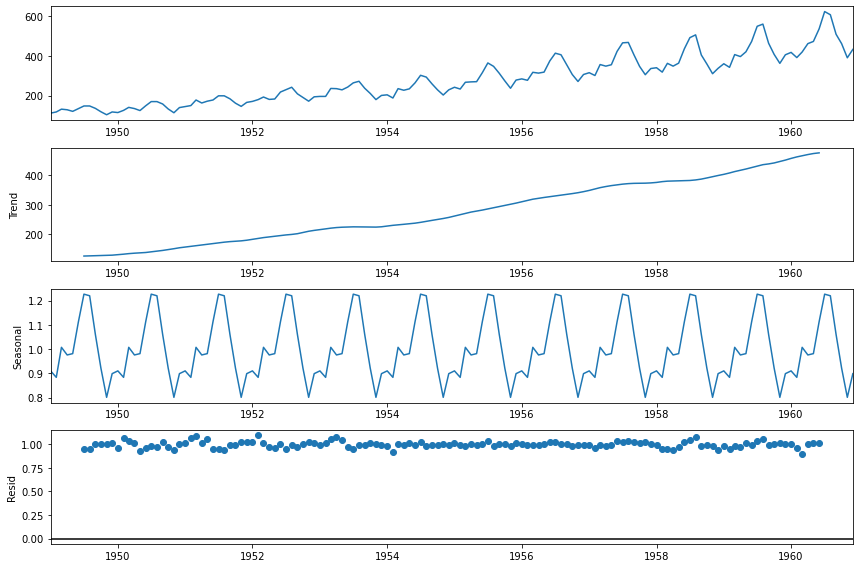

In [15]:
#Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [16]:
df1_log = df1.copy()

In [17]:
#Let's try to do log transformation
df1_log['#Passengers'] = np.log(df1)

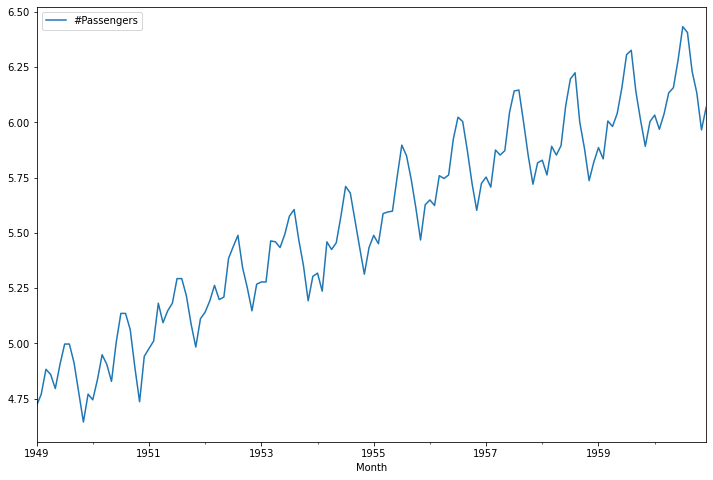

In [25]:
#visualize the log transformed series
df1_log.plot()
plt.show()

In [26]:
df1_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [27]:
df1_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


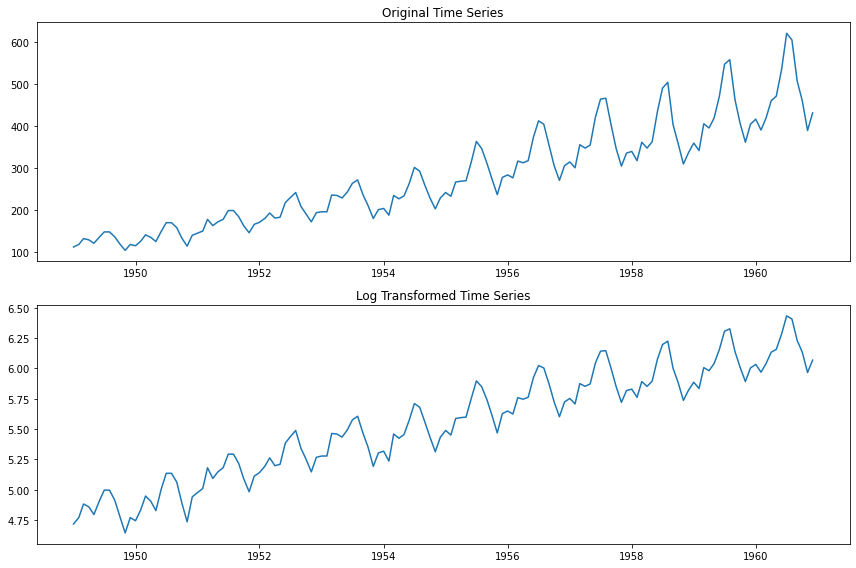

In [28]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()